# Assignment 2 - Semantic Segmentation
#### Dataset: ADE20K

## 0. Import libraries
Import all libraries/packages that you believe will help you fulfil the task, but **for the network only PyTorch can be used.**

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt

## 1. Dataset 
Load the dataset you were given. If your data does not have a test set, split a portion of your training set (at least 10%).
Explore the dataset by visualizing the images and annotations.


#### Loading the dataset
Show some images and annotations of your dataset

In [ ]:
def download_from_drive(link, filename):
  id = link.split("/")[-2]
  !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id={id}' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id={id}" -O {filename+".zip"} && rm -rf /tmp/cookies.txt
  # !unzip x -Y {filename+".zip"} {filename+"/"}

download_from_drive("https://drive.google.com/file/d/16va6PkFP3oaT_B4kQnVretMTAsBThAmJ/view?usp=sharing", "validation")

--2022-04-24 10:59:01--  https://docs.google.com/uc?export=download&confirm=t&id=16va6PkFP3oaT_B4kQnVretMTAsBThAmJ
Resolving docs.google.com (docs.google.com)... 172.253.123.100, 172.253.123.138, 172.253.123.139, ...
Connecting to docs.google.com (docs.google.com)|172.253.123.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-9k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5902g4dik6hr66p6q5a7m62qogcl7km1/1650797925000/01417028173155216379/*/16va6PkFP3oaT_B4kQnVretMTAsBThAmJ?e=download [following]
--2022-04-24 10:59:01--  https://doc-00-9k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5902g4dik6hr66p6q5a7m62qogcl7km1/1650797925000/01417028173155216379/*/16va6PkFP3oaT_B4kQnVretMTAsBThAmJ?e=download
Resolving doc-00-9k-docs.googleusercontent.com (doc-00-9k-docs.googleusercontent.com)... 172.253.123.132, 2607:f8b0:400c:c16::84
Connecting to doc-00-9k-docs.googleusercontent.com (doc-

In [ ]:
!unzip '/content/validation.zip'

Streaming output truncated to the last 5000 lines.
  inflating: validation/cultural/science_museum/ADE_val_00001743/instance_006_ADE_val_00001743.png  
  inflating: __MACOSX/validation/cultural/science_museum/ADE_val_00001743/._instance_006_ADE_val_00001743.png  
  inflating: validation/cultural/science_museum/ADE_val_00001743/instance_047_ADE_val_00001743.png  
  inflating: __MACOSX/validation/cultural/science_museum/ADE_val_00001743/._instance_047_ADE_val_00001743.png  
  inflating: validation/cultural/science_museum/ADE_val_00001743/instance_003_ADE_val_00001743.png  
  inflating: __MACOSX/validation/cultural/science_museum/ADE_val_00001743/._instance_003_ADE_val_00001743.png  
  inflating: validation/cultural/science_museum/ADE_val_00001743/instance_042_ADE_val_00001743.png  
  inflating: __MACOSX/validation/cultural/science_museum/ADE_val_00001743/._instance_042_ADE_val_00001743.png  
  inflating: validation/cultural/science_museum/ADE_val_00001743/instance_034_ADE_val_00001743.pn

Removing all the unnecessary folder structure.

In [ ]:
import shutil, os
    
dir = 'validation'
folders = os.listdir(dir)
    
for folder in folders:
  folder_name = os.path.join(dir, folder)
  subfolders = os.listdir(folder_name)

  for subfolder in subfolders:
    subfolder_name = os.path.join(folder_name, subfolder)
    files = os.listdir(subfolder_name)

    for file_name in files:
      file_path = os.path.join(subfolder_name, file_name)
      if 'seg' in file_name or 'parts' in file_name:
        os.remove(file_path)
      else:
        shutil.move(file_path, os.path.join(dir, file_name))

Getting all the images at one place.

In [ ]:
all_files = os.listdir(dir)

images = [file_name for file_name in all_files if '.jpg' in file_name]
os.mkdir(os.path.join(dir, 'images'))

for image in images:
  old_file_path = os.path.join(dir, image)
  new_file_path = os.path.join(dir, 'images', image)
  shutil.move(old_file_path, new_file_path)

jsons = [file_name for file_name in all_files if '.json' in file_name]
folders = list(set(all_files) - set(jsons) - set(images))

images

['ADE_val_00001656.jpg',
 'ADE_val_00000206.jpg',
 'ADE_val_00000537.jpg',
 'ADE_val_00001347.jpg',
 'ADE_val_00000172.jpg',
 'ADE_val_00000027.jpg',
 'ADE_val_00000279.jpg',
 'ADE_val_00000339.jpg',
 'ADE_val_00001941.jpg',
 'ADE_val_00001136.jpg',
 'ADE_val_00000764.jpg',
 'ADE_val_00000676.jpg',
 'ADE_val_00001004.jpg',
 'ADE_val_00000698.jpg',
 'ADE_val_00001913.jpg',
 'ADE_val_00000555.jpg',
 'ADE_val_00000954.jpg',
 'ADE_val_00000342.jpg',
 'ADE_val_00000255.jpg',
 'ADE_val_00001454.jpg',
 'ADE_val_00001099.jpg',
 'ADE_val_00000723.jpg',
 'ADE_val_00001895.jpg',
 'ADE_val_00002000.jpg',
 'ADE_val_00000749.jpg',
 'ADE_val_00000307.jpg',
 'ADE_val_00000335.jpg',
 'ADE_val_00000375.jpg',
 'ADE_val_00001803.jpg',
 'ADE_val_00001295.jpg',
 'ADE_val_00001934.jpg',
 'ADE_val_00000657.jpg',
 'ADE_val_00001725.jpg',
 'ADE_val_00000311.jpg',
 'ADE_val_00000118.jpg',
 'ADE_val_00000710.jpg',
 'ADE_val_00001609.jpg',
 'ADE_val_00001923.jpg',
 'ADE_val_00001930.jpg',
 'ADE_val_00001635.jpg',


Removing empty folders.

In [ ]:
rem_folders = [folder for folder in folders if 'ADE' not in folder]

for rem_folder in rem_folders:
  rem_folder_name = os.path.join(dir, rem_folder)

  for subfolders in os.listdir(rem_folder_name):
    os.rmdir(os.path.join(rem_folder_name, subfolders))

  os.rmdir(rem_folder_name)

#### Pre-processing the dataset

In [ ]:
import torchvision.transforms as TR
from torchvision import datasets, utils

imageNetMean = [0.485, 0.456, 0.406]
imageNetStd  = [0.229, 0.224, 0.225]

transform = TR.Compose([
    TR.Resize(256),
    TR.CenterCrop(224),
    TR.ToTensor(),
    TR.Normalize(mean=imageNetMean, std=imageNetStd)
])

Getting an image filename.

In [ ]:
def get_img(name):
  folder = os.path.join(dir, 'images')
  return os.path.join(folder, name)

Transforming an image to able to show it.

In [ ]:
def show_transformed_image(image_file):
  trans_img = transform(image_file).permute([1,2,0])
  plt.imshow(trans_img)
  plt.show()

Preprocessing an image.

In [ ]:
def trf_img(image_name):
  img = Image.open(get_img(image_name))
  return transform(img)

Sample images from the dataset.

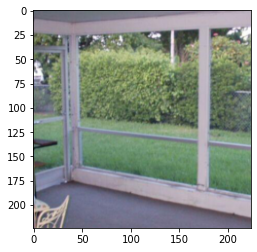

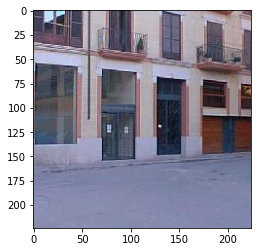

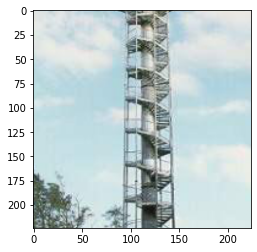

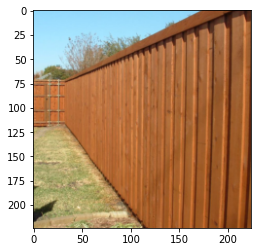

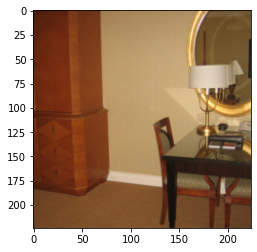

In [ ]:
from PIL import Image

for i in range(5):
  img = Image.open(get_img(images[i]))
  show_transformed_image(img)

## 2. Models
Load the 3 chosen models for your given task. Show the model's architecture.

#### Load the models
Show the architectures

In [ ]:
from torchvision.models.segmentation import fcn_resnet50, fcn_resnet101, deeplabv3_resnet50

model_fcn_resnet50 = fcn_resnet50(pretrained=True, num_classes=21, pretrained_backbone=True).eval()
model_fcn_resnet50._modules

Downloading: "https://download.pytorch.org/models/fcn_resnet50_coco-1167a1af.pth" to /root/.cache/torch/hub/checkpoints/fcn_resnet50_coco-1167a1af.pth


  0%|          | 0.00/135M [00:00<?, ?B/s]

OrderedDict([('backbone', IntermediateLayerGetter(
                (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
                (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                (relu): ReLU(inplace=True)
                (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
                (layer1): Sequential(
                  (0): Bottleneck(
                    (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
                    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
                    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                    (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                    (b

In [ ]:
model_fcn_resnet101 = fcn_resnet101(pretrained=True, num_classes=21, pretrained_backbone=True).eval()
model_fcn_resnet101._modules

Downloading: "https://download.pytorch.org/models/fcn_resnet101_coco-7ecb50ca.pth" to /root/.cache/torch/hub/checkpoints/fcn_resnet101_coco-7ecb50ca.pth


  0%|          | 0.00/208M [00:00<?, ?B/s]

OrderedDict([('backbone', IntermediateLayerGetter(
                (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
                (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                (relu): ReLU(inplace=True)
                (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
                (layer1): Sequential(
                  (0): Bottleneck(
                    (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
                    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
                    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                    (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                    (b

In [ ]:
model_deeplabv3_resnet50 = deeplabv3_resnet50(pretrained=True, num_classes=21, pretrained_backbone=True).eval()
model_deeplabv3_resnet50._modules

Downloading: "https://download.pytorch.org/models/deeplabv3_resnet50_coco-cd0a2569.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet50_coco-cd0a2569.pth


  0%|          | 0.00/161M [00:00<?, ?B/s]

OrderedDict([('backbone', IntermediateLayerGetter(
                (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
                (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                (relu): ReLU(inplace=True)
                (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
                (layer1): Sequential(
                  (0): Bottleneck(
                    (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
                    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
                    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                    (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                    (b

### Segmentation examples

#### Mapping the class values

In [ ]:
# these can be segmented by the model
backbone_classes = ['__background__', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
  'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
  'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']

# these are the same in the bkackbone and in the dataset
backbone_and_dataset_classes = ['aeroplane', 'bicycle', 'boat', 'bottle', 'bus',  'car', 
  'chair', 'table', 'motorbike',  'person', 'sofa', 'monitor']

# these are the classes from ade20k mapped to the backbone classes
dataset_mapped_classes = [None, 'aeroplane', 'bicycle', 'animal', 'boat', 'bottle', 'bus',
 'car', 'animal', 'chair', 'animal', 'table', 'animal', 'animal', 'motorbike',
 'person', None, 'animal', 'sofa', None, 'monitor']

# mapped the segmented classname to a classname in the dataset
def get_dataset_classname(backbone_classname):
  # animals mapped to animal
  if backbone_classname in ['cat', 'bird', 'cow', 'dog', 'horse', 'sheep']:
    return 'animal'
  if backbone_classname == 'pottedplant':
    return 'plant'
  if backbone_classname == 'tvmonitor':
    return 'monitor'
  # same
  if backbone_classname in backbone_and_dataset_classes:
    return backbone_classname
  # not detectable
  return None

# get the backbone layer index from a classname in the dataset
def get_backbone_index(dataset_classname):
  return dataset_mapped_classes.index(dataset_classname)

#### Getting expected segmentation

In [ ]:
def fn(file_name):
  return os.path.join(dir, file_name)

Collecting all objects that should be segmented according to the dataset and that can be segmented by the model. 

In [ ]:
import json

def get_detectable_objects(image_name):
  detectable_objects = []
  json_name = image_name.replace('.jpg', '.json')

  with open(fn(json_name)) as json_file:
      meta = json.load(json_file)
      objects = meta['annotation']['object']

      for object_present in objects:
        names = object_present['name'].split(", ")
        detectable = None

        for name in names:
          detectable = get_dataset_classname(name)
        
          if detectable != None:
            if object_present['parts']['part_level'] == 0:
              detectable_objects.append([detectable, object_present['instance_mask']])

      return detectable_objects

In [ ]:
segm_transform = TR.Compose([
    TR.Resize(256),
    TR.CenterCrop(224),
    TR.ToTensor(),
    TR.Normalize(mean=imageNetMean, std=imageNetStd)
])

Implementation of the expected segmentation - creating the layers by the json metadata file.

In [ ]:
def get_representation_matrix(output, print_name=False):
  torch_repr = torch.argmax(output.squeeze(), dim=0) # max index for the pixels

  if print_name:
    print("Segmented image contains:")
    classes = torch.unique(torch_repr)
    for rec_class_index in classes:
      print(backbone_classes[rec_class_index], '->', get_dataset_classname(backbone_classes[rec_class_index]))

  numpy_repr = torch_repr.detach().cpu().numpy()
  return numpy_repr

def get_expected_segm(image_name):
  objs = get_detectable_objects(image_name)
  fully_segm = torch.Tensor(np.full((21, 224, 224), 0))

  for obj_array in objs:
    img = Image.open(fn(obj_array[1]))
    trfd_img = torch.squeeze(segm_transform(img))
    index = get_backbone_index(obj_array[0])
    fully_segm[index] += trfd_img

  fully_segm[fully_segm>0] = 1
    
  return fully_segm

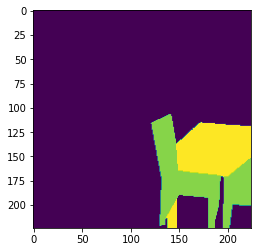

In [ ]:
plt.imshow(get_representation_matrix(get_expected_segm(images[4])))
plt.show()

#### Segmenting a picture with a model

Implementation of the actual segmentation by the model.

In [ ]:
def get_output(model, image):
  input = transform(image).unsqueeze(0) # to have 1 x depth x height x width
  output = model(input)['out']
  return output

def show_comparison(result, image, expected):
  fig = plt.figure(figsize=(15, 45))
  ax1 = fig.add_subplot(131)
  ax2 = fig.add_subplot(132)
  ax3 = fig.add_subplot(133)

  ax1.imshow(result)
  ax1.title.set_text('Segmentation result')

  ax2.imshow(expected) # TODO
  ax2.title.set_text('Expected segmentation')

  ax3.imshow(transform(image).permute([1,2,0]))
  ax3.title.set_text('Original image')

  plt.show()

In [ ]:
def segment_image(model, image_name):
  image = Image.open(get_img(image_name))
  matrix_segm = get_representation_matrix(get_output(model, image), True)
  expected_segm = get_representation_matrix(get_expected_segm(image_name))
  show_comparison(matrix_segm, image, expected_segm)

All the models tested.

In [ ]:
models = [
  {'name': 'model_deeplabv3_resnet50',
  'model': model_deeplabv3_resnet50}, 
  {'name': 'model_fcn_resnet50',
  'model': model_fcn_resnet50}, 
  {'name': 'model_fcn_resnet101',
  'model':model_fcn_resnet101}
]

Some examples.

model_deeplabv3_resnet50
Segmented image contains:
__background__ -> None


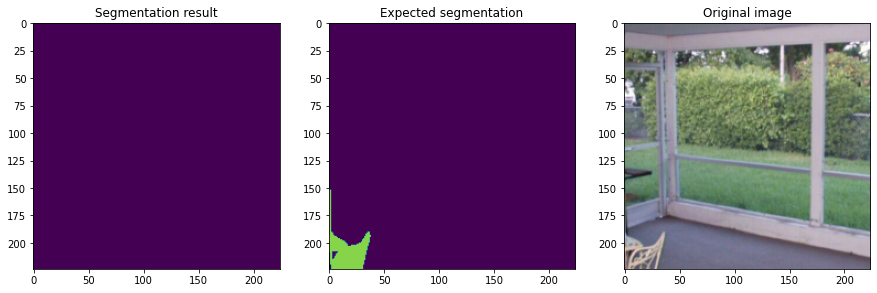

model_fcn_resnet50
Segmented image contains:
__background__ -> None


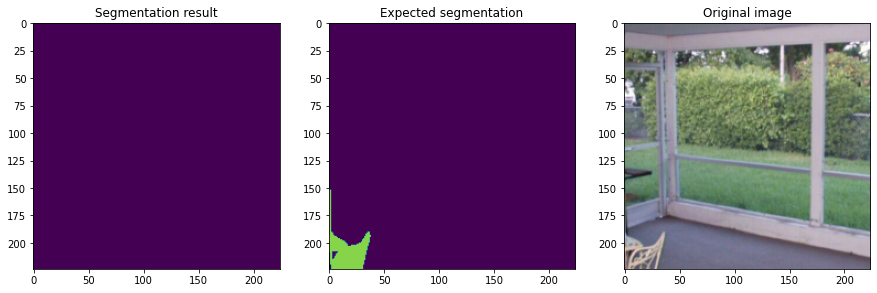

model_fcn_resnet101
Segmented image contains:
__background__ -> None


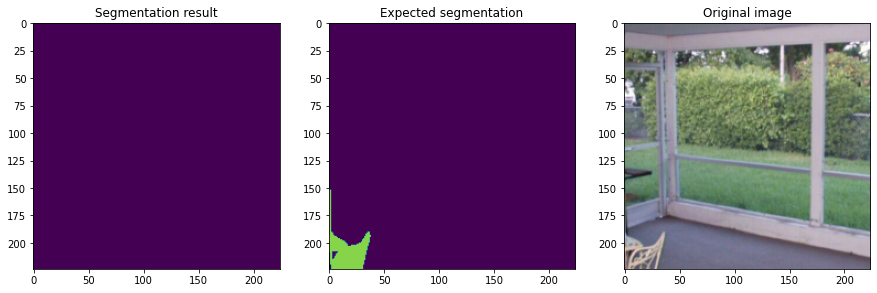

model_deeplabv3_resnet50
Segmented image contains:
__background__ -> None
chair -> chair


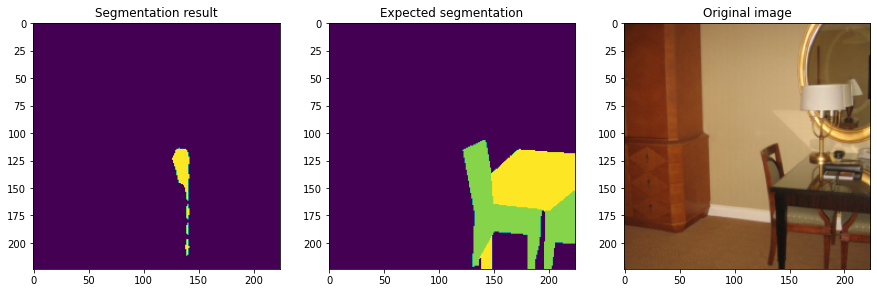

model_fcn_resnet50
Segmented image contains:
__background__ -> None
chair -> chair


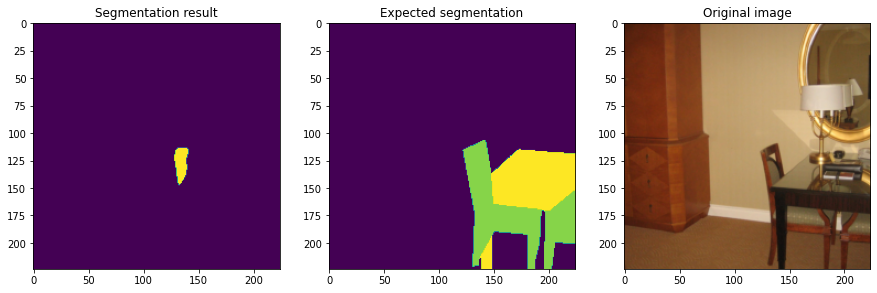

model_fcn_resnet101
Segmented image contains:
__background__ -> None
chair -> chair


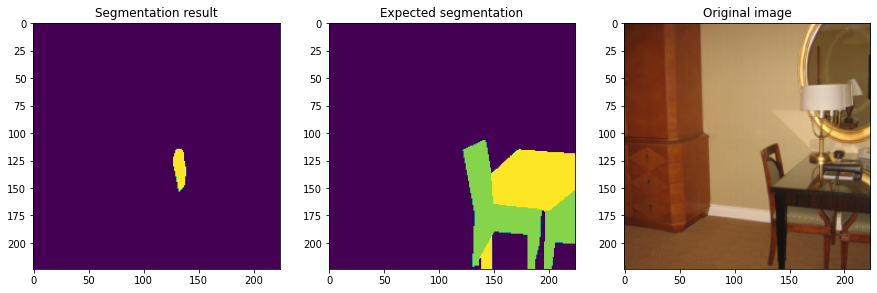

model_deeplabv3_resnet50
Segmented image contains:
__background__ -> None


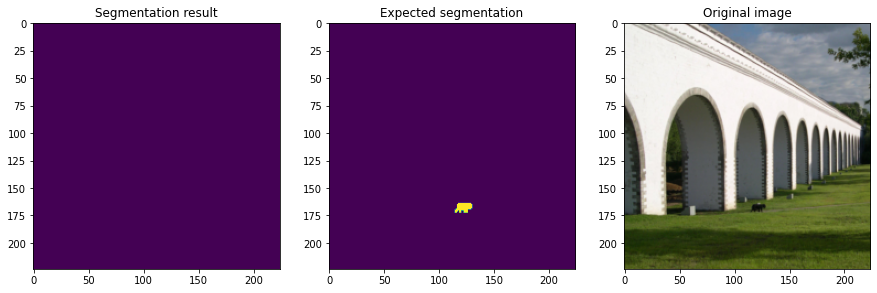

model_fcn_resnet50
Segmented image contains:
__background__ -> None


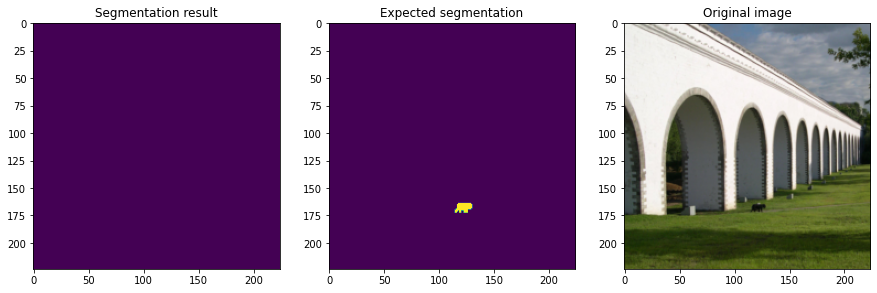

model_fcn_resnet101
Segmented image contains:
__background__ -> None


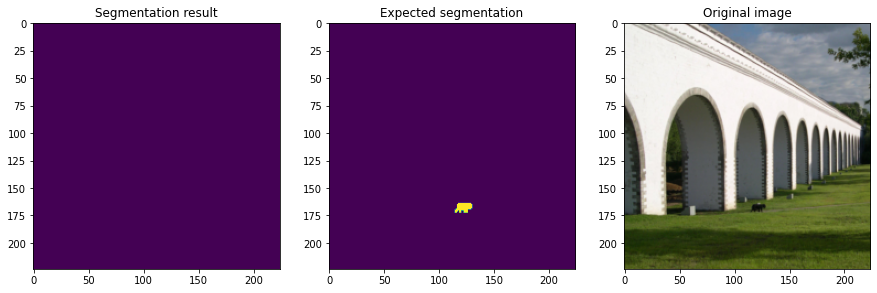

model_deeplabv3_resnet50
Segmented image contains:
__background__ -> None


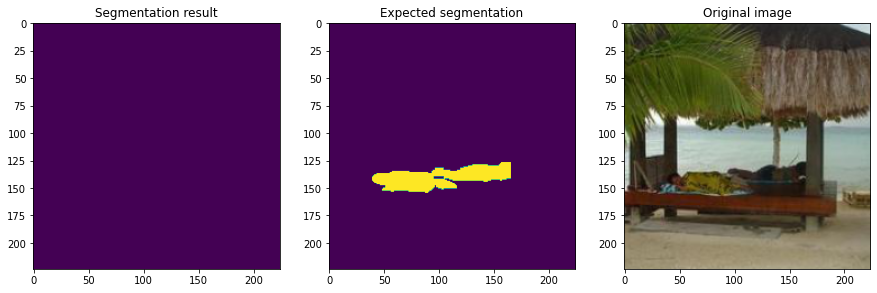

model_fcn_resnet50
Segmented image contains:
__background__ -> None
boat -> boat


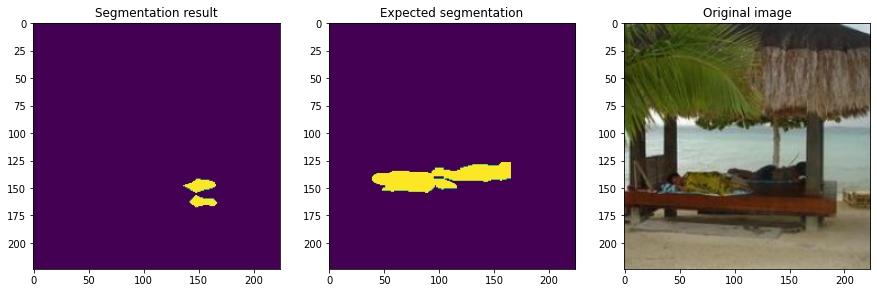

model_fcn_resnet101
Segmented image contains:
__background__ -> None


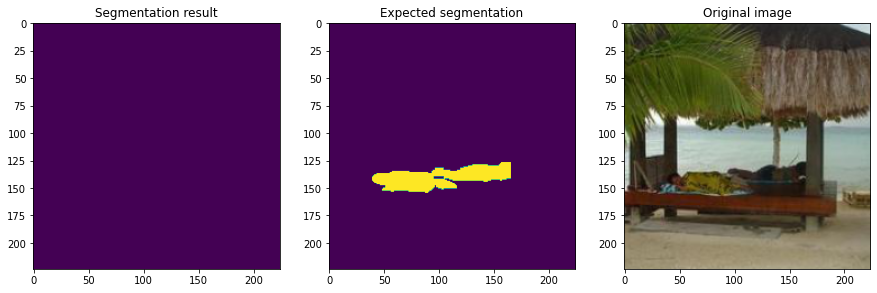

In [ ]:
test_images = [images[0], images[4], images[5], images[8]]

for image_name in test_images:
  for model in models:
    print(model['name'])
    segment_image(model['model'], image_name)

## 3. Evaluation
This is the most important part. Please give a detailed comparison between the models.

**Implement your metrics manually**. Do not use pre defined Pytorch metrics.

Calculate the metrics for each model on the test set.

Plot the metrics.

Show some predictions in comparison to the ground truth.

#### Evaluate your models

Potential loss functions I  have considered implementing:
- pixel-wise cross entropy loss
- (soft) Dice loss
- Tversky Loss
- Hausdorff distance
- IoU
- ...


#### Pixel-wise cross entropy loss

In [ ]:
# prediction has some negative numbers in it, normalizing between 0 and 1
# excluding the 0 for log loss
def normalize(vector):
  # norm_value = (vector - np.min(vector)) / (np.max(vector)-np.min(vector)) + 0.000001
  # norm_value[norm_value == 0] = 0.00000001

  old_range = (np.max(vector) - np.min(vector)) 
  new_min = 0.000001
  new_range = (1 - new_min)  
  norm_value = (((vector - np.min(vector)) * new_range) / old_range) + new_min

  return norm_value
  
def log_loss(y_true, y_out):
  sum = 0

  if np.max(y_true) == 0:
    y_true[0] = 1

  y_pred = normalize(y_out)
  
  for i in range(21):
    sum += (y_true[i] * np.log(y_pred[i]))

  return -sum

# Simple average of cross-entropy classification loss for every pixel in the image
def pixelwise_cross_entropy_loss(result, expected):
  loss_sum = 0

  for i in range(0, 224):
    for j in range(0, 224):
      loss_sum += log_loss(expected[:, i, j].detach().numpy(), result[:, i, j].detach().numpy())

  return loss_sum

#### Dice loss

In [ ]:
def dice_coeff(y_true, y_out):
  numerator = 0
  denominator_1 = 0
  denominator_2 = 0
  y_pred = normalize(y_out)

  for i in range(0, 224):
    for j in range(0, 224):
      numerator += y_true[i,j] * y_pred[i,j]
      denominator_1 += y_true[i,j]**2
      denominator_2 += y_pred[i,j]**2

  return 1 - ((2 * numerator) / (denominator_1 + denominator_2))

def dice_loss(result, expected):
  loss_sum = 0

  for c in range(0, 21):
    loss_sum += dice_coeff(expected[c].detach().numpy(), result[c].detach().numpy())

  return loss_sum

#### IoU

In [ ]:
def iou(y_true, y_out):
  TP = 0
  FPFN = 0

  exp = np.argmax(y_true)
  pred = np.argmax(y_out)

  if exp == pred:
    TP += 1
  else:
    FPFN += 1

  return TP/(TP+FPFN)


def iou_loss(result, expected):
  loss_sum = 0

  for i in range(0, 224):
    for j in range(0, 224):
      loss_sum += iou(expected[:, i, j].detach().numpy(), result[:, i, j].detach().numpy())

  return loss_sum

#### Show the metrics results

In [ ]:
def calc_loss(model, image_name, metric_function):
  image = Image.open(get_img(image_name))

  # each pixel has the one-hot encoded vector
  matrix_segm = get_output(model, image).squeeze(0)
  expected_segm = get_expected_segm(image_name)

  return metric_function(matrix_segm, expected_segm)

def compare_models_by_metric(models, image_name, metric_function):
  losses = []

  for model in models:
    loss = calc_loss(model['model'], image_name, metric_function)
    # print(model['name'], loss)
    losses.append(loss)

  return losses

In [ ]:
loss_pixelwise = [0, 0 ,0]
loss_softdice  = [0, 0 ,0]
loss_intounion = [0, 0 ,0]

for i in range(100):
  loss_pixelwise = np.add(loss_pixelwise, compare_models_by_metric(models, images[i], pixelwise_cross_entropy_loss))
  loss_softdice = np.add(loss_softdice, compare_models_by_metric(models, images[i], dice_loss))
  loss_intounion = np.add(loss_intounion, compare_models_by_metric(models, images[i], iou_loss))

loss_softdice, loss_pixelwise, loss_intounion

(array([1035.91125645, 1036.88573659, 1035.91861591]),
 array([36971.24342926, 30371.9204883 , 27674.79635974]),
 array([2306897., 2395847., 2407059.]))

<BarContainer object of 3 artists>

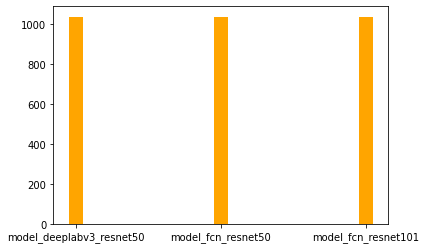

In [ ]:
plt.bar([model['name'] for model in models], loss_softdice, 0.1, color='orange')

<BarContainer object of 3 artists>

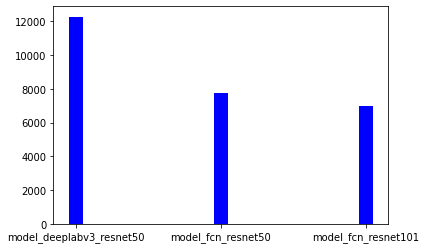

In [ ]:
plt.bar([model['name'] for model in models], loss_pixelwise, 0.1, color='blue')

<BarContainer object of 3 artists>

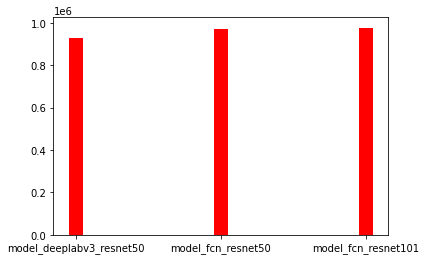

In [ ]:
plt.bar([model['name'] for model in models], loss_intounion, 0.1, color='red')